In [ ]:
#Add resources

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split #imported only to split the train data into test and validation


#Dataset 1
url_train = 'https://drive.google.com/file/d/1ntB1n8ufwsLzfzB7y7YKO1KPVFjkajpw/view?usp=share_link'
path_train = 'https://drive.google.com/uc?export=download&id='+url_train.split('/')[-2]
dataset_train = pd.read_csv(path_train,header=None)
url_test = 'https://drive.google.com/file/d/18vUwXa0tnHsRN-bwl968Sm2sstq3zKJL/view?usp=share_link'
path_test = 'https://drive.google.com/uc?export=download&id='+url_test.split('/')[-2]
dataset_test = pd.read_csv(path_test,header=None)

data_train = dataset_train.to_numpy()
X=data_train[:,0:2]
Y=data_train[:,2]

#Visualising Relationship between data
'''plt.scatter(X[:,0],X[:,1])
plt.show()'''

#Since X1 and X2 are linearly related, we drop X2 as it does not have an effect on the solution. We can accurately predict Y with just X1
X1=X[:,0]
X_train, X_val, Y_train, Y_val = train_test_split(X1,Y, train_size=0.8)

data_test = dataset_test.to_numpy()
X_test=data_test[:,0]
Y_test=data_test[:,2]


#Normalising the data
def normalise_train(X):
  X_mean=np.mean(X)
  X_sdev=np.std(X)
  Xa=X-X_mean
  Xn=Xa/(X_sdev)
  return(Xn,X_mean,X_sdev)

def normalise_test(X,X_mean,X_sdev):
  Xa=X-X_mean
  Xn=Xa/(X_sdev)
  return(Xn)

def original(Xn,X_mean,X_sdev):
  Xa=Xn*X_sdev
  X=Xa+X_mean
  return(X)
x_train_nor,x_mean_,x_sdev=normalise_train(X1)
y_train_nor,y_mean,y_sdev=normalise_train(Y)
X_nor,X_mean,X_sdev=normalise_train(X_train)
Y_nor,Y_mean,Y_sdev=normalise_train(Y_train)
X_val_nor=normalise_test(X_val,X_mean,X_sdev)
Y_val_nor=normalise_test(Y_val,Y_mean,Y_sdev)
X_test_nor=normalise_test(X_test,X_mean,X_sdev)
Y_test_nor=normalise_test(Y_test,Y_mean,Y_sdev)

def MSE(Y,Y_pred):
  Y=np.reshape(Y,(Y.shape[0],1))
  mse=(np.sum(np.square(Y_pred-Y)))/(Y.shape[0])
  return(mse)
def Y_shape(Y):
  Y=np.reshape(Y,(Y.shape[0],1))
  return(Y)

def X_degree(x,degree):
  xt=np.reshape(x,(x.shape[0],1))
  if degree>1:
    for i in range(2,degree+1):
      xd2=np.array([[j**i] for j in x])
      xt=np.concatenate([xd2,xt],axis=1)
  xt=np.insert(xt,degree,np.ones((1,1)),axis=1)
  return(xt)
  
def predict(B,X_t):
  Y_pred=np.matmul(X_t,B)
  return(Y_pred)

def pseudo_inv(Xt,Y):
  B=np.matmul(np.linalg.pinv(Xt),Y)
  Y_pred=np.matmul(Xt,B)
  plt.plot()
  return(B)
def plot_curve(X,Y,weight,degree,type):
  x = np.linspace(-3,5,100)
  y=0
  for i in range (degree):
    y+= weight[i]*(x**(degree-i))
  plt.scatter(original(X,X_mean,X_sdev),original(Y,Y_mean,Y_sdev),label=type+"Data:Degree="+str(degree))
  plt.plot(original(x,X_mean,X_sdev),original(y,Y_mean,Y_sdev), '-r', label="Best Fit curve:Degree="+str(degree))
  plt.legend()
  plt.xlim([400,3000])
  plt.ylim([65000, 155000])
  plt.title("Plot of"+type+"Data and Best Fit Polynomial of degree "+str(degree))
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.show()

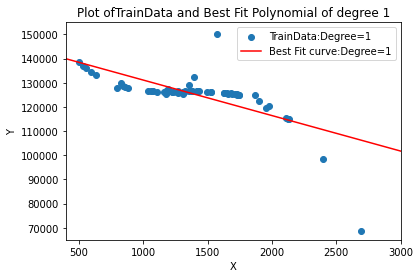

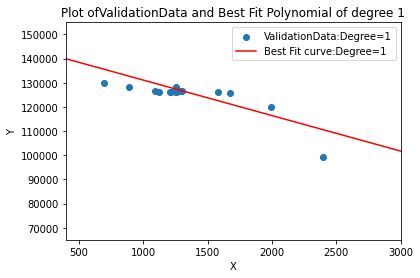

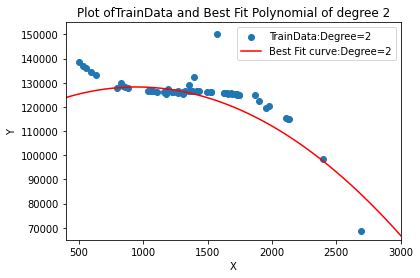

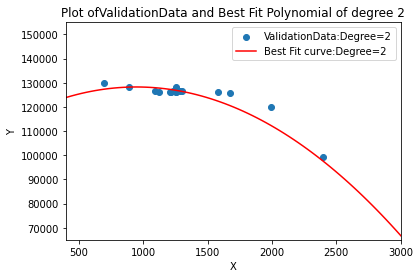

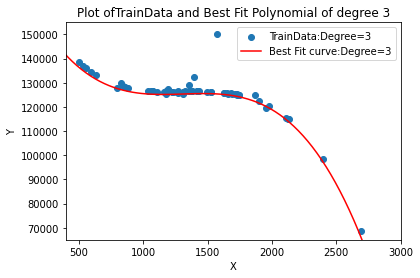

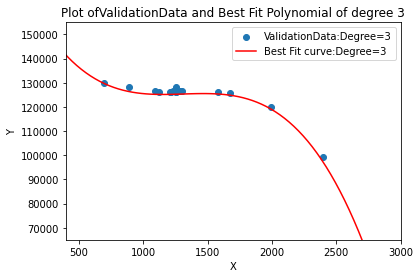

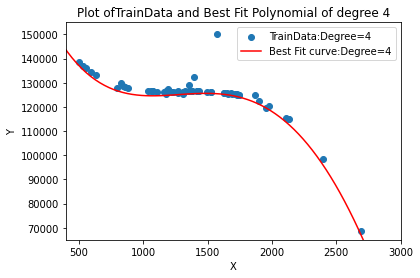

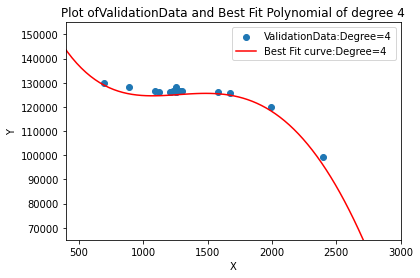

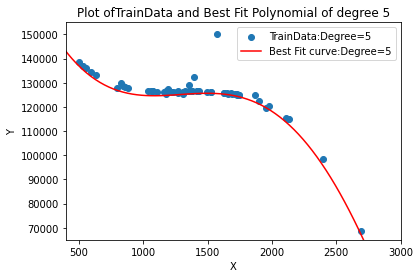

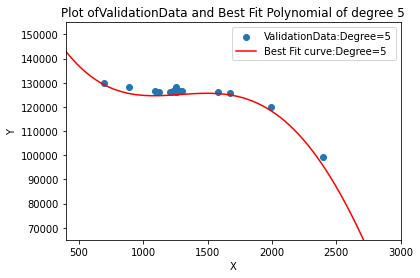

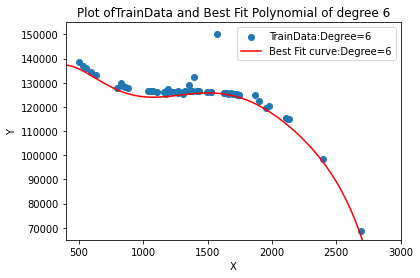

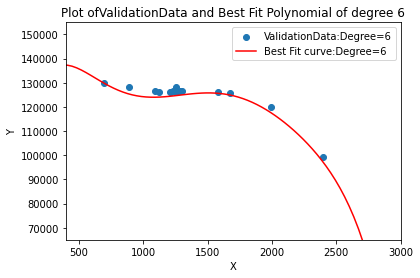

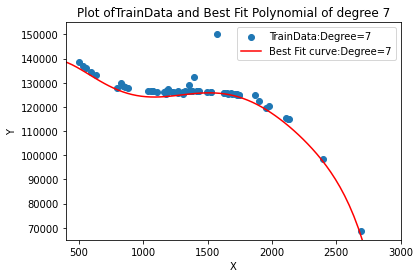

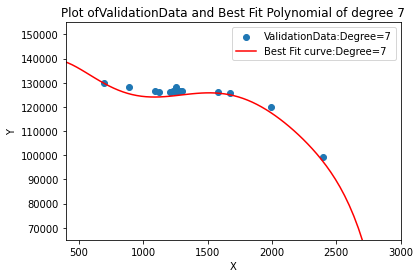

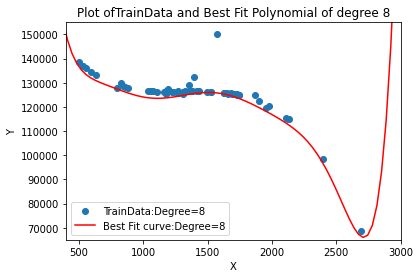

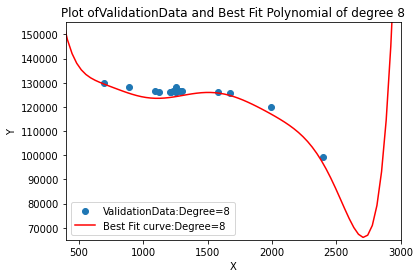

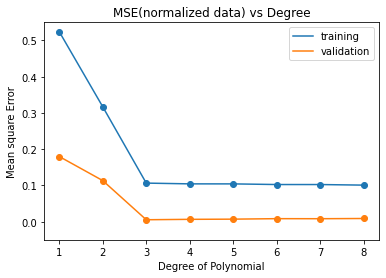

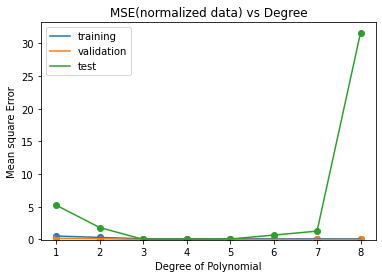

Best curve degree= 3
Train MSE(normalized data)= 0.10641280602015747
Test MSE(normalized data)= 0.016829255263130113


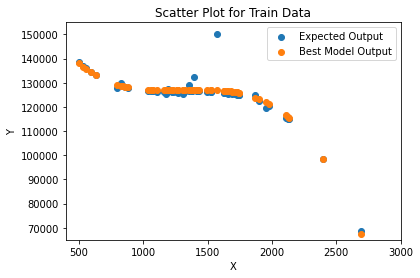

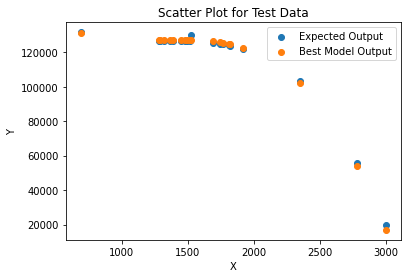

In [ ]:
d=8
train_mse=[]
Val_mse=[]
test_mse=[]
for degree in range(1,d+1):
  weight=pseudo_inv(X_degree(X_nor,degree),Y_shape(Y_nor))
  plot_curve(X_nor,Y_nor,weight,degree,"Train")
  Y_train_pred=predict(weight,X_degree(X_nor,degree))
  train_mse+=[MSE(Y_nor,Y_train_pred)]
  plot_curve(X_val_nor,Y_val_nor,weight,degree,"Validation")
  Y_val_pred=predict(weight,X_degree(X_val_nor,degree))
  Val_mse+=[MSE(Y_val_nor,Y_val_pred)]
  Y_test_pred=predict(weight,X_degree(X_test_nor,degree))
  test_mse+=[MSE(Y_test_nor,Y_test_pred)]
deg=[i for i in range(1,d+1)]
plt.scatter(deg,train_mse)
plt.scatter(deg,Val_mse)
plt.plot(deg,train_mse,label='training')
plt.plot(deg,Val_mse,label='validation')
plt.ylim(bottom=-0.05)
plt.xticks(deg,deg)
plt.legend()
plt.title("MSE(normalized data) vs Degree")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean square Error")
plt.show() 
plt.scatter(deg,train_mse)
plt.scatter(deg,Val_mse)
plt.scatter(deg,test_mse)
plt.plot(deg,train_mse,label='training')
plt.plot(deg,Val_mse,label='validation')
plt.plot(deg,test_mse,label='test')
plt.ylim(bottom=-0.05)
plt.xticks(deg,deg)
plt.legend()
plt.title("MSE(normalized data) vs Degree")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean square Error")
plt.show() 

z=test_mse.index(min(test_mse))+1
print("Best curve degree=",z)
print("Train MSE(normalized data)=",train_mse[z-1])
print("Test MSE(normalized data)=",test_mse[z-1])
weight=pseudo_inv(X_degree(X_nor,z),Y_shape(Y_nor))
Y_train_pred=predict(weight,X_degree(X_nor,z))
Y_test_pred=predict(weight,X_degree(X_test_nor,z))
plt.scatter(original(X_nor,X_mean,X_sdev),original(Y_nor,Y_mean,Y_sdev),label='Expected Output')
plt.scatter(original(X_nor,X_mean,X_sdev),original(Y_train_pred,Y_mean,Y_sdev),label='Best Model Output')
plt.title("Scatter Plot for Train Data")
plt.xlim([400,3000])
plt.ylim([65000, 155000])
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()
plt.scatter(original(X_test_nor,X_mean,X_sdev),original(Y_test_nor,Y_mean,Y_sdev),label='Expected Output')
plt.scatter(original(X_test_nor,X_mean,X_sdev),original(Y_test_pred,Y_mean,Y_sdev),label='Best Model Output')
plt.title("Scatter Plot for Test Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

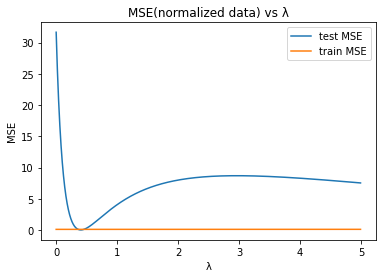

Train MSE is very low for all values of λ. Hence we consider only the lowest Test MSE to find the best model
Value of λ for Best Model is 0.4
Train MSE(normalized data)= 0.102369464561821
Test MSE(normalized data)= 0.012701153316455169


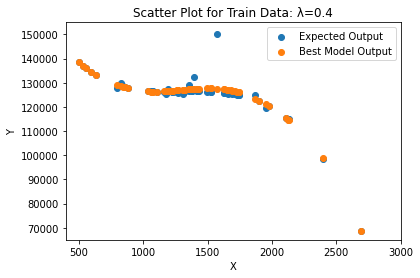

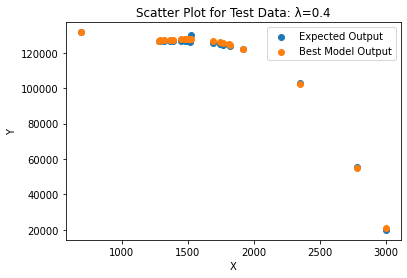

In [ ]:
'''From the MSE vs Degree plot above,we can see that the above model starts to over fit from degree=7 and 8. Hence we apply ridge regression for degree=8'''
def ridge(Xt,Y,l,degree):
  I=np.identity(degree+1)
  I[0][0]=0
  XT=np.transpose(Xt)
  B=(np.matmul((np.matmul(np.linalg.inv((np.matmul(XT,Xt)+l*I)),XT)),Y))
  Y_pred=np.matmul(Xt,B)
  return(B)

degree=8
la=500
test_mse=[]
train_mse=[]
for l in range(0,la):
  l=l/100
  weight=ridge(X_degree(X_nor,degree),Y_shape(Y_nor),l,degree)
  Y_train_pred=predict(weight,X_degree(X_nor,degree))
  train_mse+=[MSE(Y_nor,Y_train_pred)]
  Y_test_pred=predict(weight,X_degree(X_test_nor,degree))
  test_mse+=[MSE(Y_test_nor,Y_test_pred)]
l=[i/100 for i in range(0,la)]
plt.plot(l,test_mse,label="test MSE")
plt.plot(l,train_mse,label="train MSE")
plt.legend()
plt.title("MSE(normalized data) vs λ")
plt.xlabel('λ')
plt.ylabel('MSE')
plt.show()
z=(test_mse.index(min(test_mse)))/100
weight=ridge(X_degree(X_nor,degree),Y_shape(Y_nor),z,degree)
Y_train_pred=predict(weight,X_degree(X_nor,degree))
train_mse=MSE(Y_nor,Y_train_pred)
Y_test_pred=predict(weight,X_degree(X_test_nor,degree))
test_mse=MSE(Y_test_nor,Y_test_pred)
print("Train MSE is very low for all values of λ. Hence we consider only the lowest Test MSE to find the best model")
print("Value of λ for Best Model is",z)
print("Train MSE(normalized data)=",train_mse)
print("Test MSE(normalized data)=",test_mse)
plt.scatter(original(X_nor,X_mean,X_sdev),original(Y_nor,Y_mean,Y_sdev),label='Expected Output')
plt.scatter(original(X_nor,X_mean,X_sdev),original(Y_train_pred,Y_mean,Y_sdev),label='Best Model Output')
plt.title("Scatter Plot for Train Data: λ="+str(z))
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim([400,3000])
plt.ylim([65000, 155000])
plt.legend()
plt.show()
plt.scatter(original(X_test_nor,X_mean,X_sdev),original(Y_test_nor,Y_mean,Y_sdev),label='Expected Output')
plt.scatter(original(X_test_nor,X_mean,X_sdev),original(Y_test_pred,Y_mean,Y_sdev),label='Best Model Output')
plt.title("Scatter Plot for Test Data: λ="+str(z))
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

**Resources**

Class Slides of PRML course